<a href="https://colab.research.google.com/github/shashank-dj/ML_project/blob/main/Computer_vision_and_convolutional_neural_network_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and computer vision woth tensorflow

computer vision is the paractice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.



# Get the data


Food101 Dataset

In [4]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-15 10:42:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   114MB/s    in 0.9s    

2021-07-15 10:42:32 (114 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



# Inspect the data

In [5]:
 !ls pizza_steak

test  train


In [6]:
!ls pizza_steak/train/

pizza  steak


In [7]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [8]:
import os

#Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '(dirpath)'.")

There are 2 directories and 1 images in '(dirpath)'.
There are 2 directories and 1 images in '(dirpath)'.
There are 0 directories and 750 images in '(dirpath)'.
There are 0 directories and 750 images in '(dirpath)'.
There are 2 directories and 1 images in '(dirpath)'.
There are 0 directories and 250 images in '(dirpath)'.
There are 0 directories and 250 images in '(dirpath)'.


In [9]:
#the extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 15 10:42 .
drwxr-xr-x 1 root root 4096 Jul 15 10:42 ..
-rw-r--r-- 1 root root 6148 Jul 15 10:42 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 15 10:42 test
drwxr-xr-x 4 root root 4096 Jul 15 10:42 train


In [10]:
#another wat to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [11]:
num_steak_images_train

750

to visualize our images ,  first let's get the class names programmiaticallty

In [12]:
#Get the classmates programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
#create a list of class_names from the subdirectory
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]#remove .DS_store

In [13]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [14]:
#let's visualize our images
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import random
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read int eh image and plot itusing matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)

  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}")# show the shape of the image

  return img


image shape: (512, 512, 3)


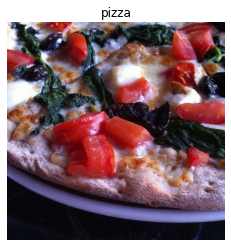

In [15]:
# view a random image from the training dataet
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="pizza")

In [16]:
img

array([[[208, 185, 169],
        [236, 212, 200],
        [250, 230, 223],
        ...,
        [ 17,  11,  15],
        [ 15,   9,  13],
        [ 13,   7,  11]],

       [[229, 207, 193],
        [250, 228, 217],
        [255, 240, 234],
        ...,
        [ 15,   9,  13],
        [ 15,   9,  13],
        [ 15,   9,  13]],

       [[249, 229, 218],
        [255, 236, 229],
        [255, 241, 239],
        ...,
        [ 13,   7,  11],
        [ 14,   8,  12],
        [ 16,  10,  14]],

       ...,

       [[ 10,  11,  15],
        [ 10,  11,  15],
        [  9,  10,  15],
        ...,
        [  7,  11,  20],
        [  7,  11,  20],
        [  8,  12,  21]],

       [[  9,  10,  14],
        [  9,  10,  14],
        [ 10,  11,  16],
        ...,
        [  9,  13,  22],
        [  8,  12,  21],
        [  7,  11,  20]],

       [[  8,   9,  13],
        [  9,  10,  14],
        [ 10,  11,  15],
        ...,
        [ 10,  14,  23],
        [  8,  12,  21],
        [  7,  11,  20]]

In [17]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[208, 185, 169],
        [236, 212, 200],
        [250, 230, 223],
        ...,
        [ 17,  11,  15],
        [ 15,   9,  13],
        [ 13,   7,  11]],

       [[229, 207, 193],
        [250, 228, 217],
        [255, 240, 234],
        ...,
        [ 15,   9,  13],
        [ 15,   9,  13],
        [ 15,   9,  13]],

       [[249, 229, 218],
        [255, 236, 229],
        [255, 241, 239],
        ...,
        [ 13,   7,  11],
        [ 14,   8,  12],
        [ 16,  10,  14]],

       ...,

       [[ 10,  11,  15],
        [ 10,  11,  15],
        [  9,  10,  15],
        ...,
        [  7,  11,  20],
        [  7,  11,  20],
        [  8,  12,  21]],

       [[  9,  10,  14],
        [  9,  10,  14],
        [ 10,  11,  16],
        ...,
        [  9,  13,  22],
        [  8,  12,  21],
        [  7,  11,  20]],

       [[  8,   9,  13],
        [  9,  10,  14],
        [ 10,  11,  15],
        ...,
        [ 10,  14,  2

In [18]:
# View the image shape 
img.shape

(512, 512, 3)

In [19]:
#Get all the pixel values between 0 and 1
img/225.

array([[[0.92444444, 0.82222222, 0.75111111],
        [1.04888889, 0.94222222, 0.88888889],
        [1.11111111, 1.02222222, 0.99111111],
        ...,
        [0.07555556, 0.04888889, 0.06666667],
        [0.06666667, 0.04      , 0.05777778],
        [0.05777778, 0.03111111, 0.04888889]],

       [[1.01777778, 0.92      , 0.85777778],
        [1.11111111, 1.01333333, 0.96444444],
        [1.13333333, 1.06666667, 1.04      ],
        ...,
        [0.06666667, 0.04      , 0.05777778],
        [0.06666667, 0.04      , 0.05777778],
        [0.06666667, 0.04      , 0.05777778]],

       [[1.10666667, 1.01777778, 0.96888889],
        [1.13333333, 1.04888889, 1.01777778],
        [1.13333333, 1.07111111, 1.06222222],
        ...,
        [0.05777778, 0.03111111, 0.04888889],
        [0.06222222, 0.03555556, 0.05333333],
        [0.07111111, 0.04444444, 0.06222222]],

       ...,

       [[0.04444444, 0.04888889, 0.06666667],
        [0.04444444, 0.04888889, 0.06666667],
        [0.04      , 0

# an end to end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:



*   Load our images
*   Preprocess our images
*   Build a CNN to find patterns in our images
*   compile our CNN
*   Fit the CNN to our training data





In [20]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./ 255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                            batch_size = 32, 
                                            target_size = (224, 224),
                                            class_mode = "binary",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history = model_1.fit(train_data,
            epochs=5, steps_per_epoch=len(train_data),
            validation_data = valid_data,
            validation_steps=len(valid_data))

                                   

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 261ms/step - loss: 0.5524 - accuracy: 0.7000 - val_loss: 0.3748 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4127 - accuracy: 0.8087 - val_loss: 0.3796 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3983 - accuracy: 0.8193 - val_loss: 0.3382 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3318 - accuracy: 0.8607 - val_loss: 0.2804 - val_accuracy: 0.8900
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3041 - accuracy: 0.8813 - val_loss: 0.2676 - val_accuracy: 0.9000


**Note:** If the above cell is taking longe than 10 seconds per epoch , make sure you are using a GPU by going to Runtime -> Change Runtime Type -> Hardware accelerator -> GPU 

In [21]:
len(train_data)

47

In [22]:
1500/32

46.875

In [23]:
 #get the model summary
 model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

# Using the same model as before

Let's replicate the model we have built in a previous section to see if it works with our image data



In [24]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
                                                     
])


model_2.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 1.4955 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [25]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [26]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation = "relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 3.2048 - accuracy: 0.6427 - val_loss: 0.6286 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 1.3500 - accuracy: 0.6740 - val_loss: 1.1140 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5722 - accuracy: 0.7487 - val_loss: 0.4466 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4980 - accuracy: 0.7847 - val_loss: 0.4358 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5248 - accuracy: 0.7787 - val_loss: 0.4884 - val_accuracy: 0.7560


In [27]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Binary classification : Let's break it down


image shape: (499, 512, 3)
image shape: (512, 512, 3)


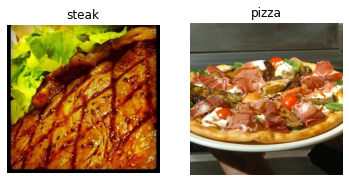

In [28]:
#visualize the data 
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# Preprocess data(prepare the model)

In [29]:
# define the directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

In [30]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
#Load in image data into directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.


In [32]:
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 500 images belonging to 2 classes.


In [33]:
#get the sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [34]:
# how many batches are there?
len(train_data)

47

In [35]:
1500/32

46.875

In [36]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [37]:
images[7].shape

(224, 224, 3)

In [38]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# 3. create a CNN model(start with baseline)

baseline is a relatively simple model or existing result that yoou setup when begining experimenting,  you try to beat the baseline 

In deep learning there is almost an infinite amount of architectures you could create . so one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required 

In [39]:
# make the creating of our modle a little easier
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [40]:
# create the model
model_4 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224,3)),
                      Conv2D(10,3, activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid")
])
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")



In [41]:
len(train_data) , len(test_data)

(47, 16)

In [42]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 13s 256ms/step - loss: 1.2302 - accuracy: 0.6373 - val_loss: 0.4806 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4570 - accuracy: 0.8073 - val_loss: 0.4193 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3574 - accuracy: 0.8507 - val_loss: 0.3660 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.2023 - accuracy: 0.9327 - val_loss: 0.4563 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 12s 251ms/step - loss: 0.0826 - accuracy: 0.9747 - val_loss: 0.5071 - val_accuracy: 0.7900


In [43]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 163ms/step - loss: 0.2676 - accuracy: 0.9000


[0.2675679922103882, 0.8999999761581421]

In [44]:
model_4.evaluate(test_data)

16/16 [==============================] - 3s 165ms/step - loss: 0.5071 - accuracy: 0.7900


[0.507091224193573, 0.7900000214576721]

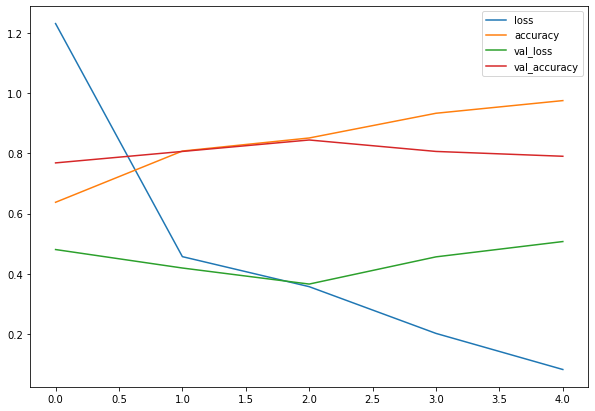

In [45]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [46]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


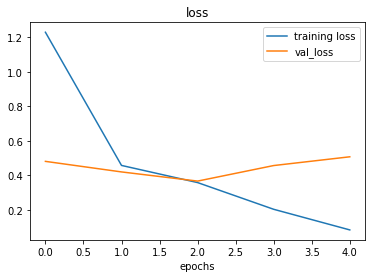

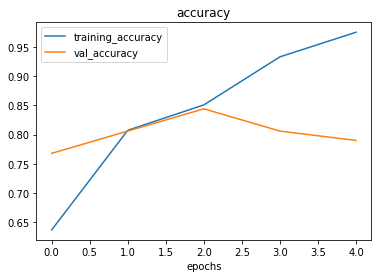

In [47]:
plot_loss_curves(history_4)

# adjust the model parameters

fitting a machine learning by overfitting a larger model comes in 3 steps:

1. create a baseline
2. beat the baseline by overfitting a larger model
3. Reduce overfitting 

ways to induce overfittng
1. increase the number of conv layers
2. increase the number of conv filters
3. add another dense layer to the output of falttened layer 

Reduce overfitting:
1. adding data augmentatin
2. add regularization layers
3. add more data

In [48]:
# create the model
model_5 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [49]:
# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [50]:
# Fit the model
history_5=model_5.fit(train_data,
            epochs=5,
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 0.6094 - accuracy: 0.6600 - val_loss: 0.5156 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4691 - accuracy: 0.7813 - val_loss: 0.3858 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4302 - accuracy: 0.8107 - val_loss: 0.4095 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4001 - accuracy: 0.8260 - val_loss: 0.3912 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3748 - accuracy: 0.8480 - val_loss: 0.3418 - val_accuracy: 0.8400


In [51]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [52]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


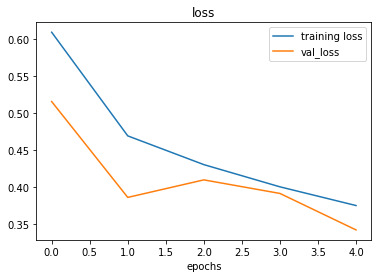

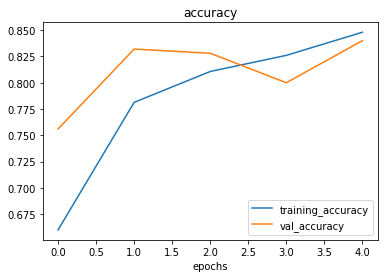

In [53]:
#plot loss curves
plot_loss_curves(history_5)

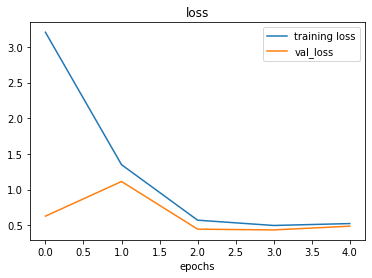

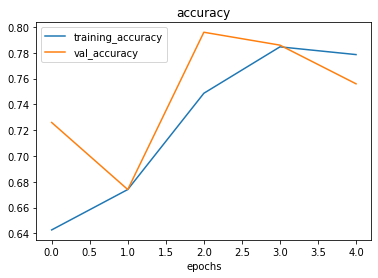

In [54]:
plot_loss_curves(history_3)

# Opening our bag of tricks and finding data augmentation

In [55]:
# create image data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
    rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# create imagedatagenerator without data augmentation 
train_datagen = ImageDataGenerator(rescale=1/255.)

#create imagedatagenerator without data augmentation for the test daaset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [56]:
# import data and augmented from trainig directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)

# create non-augmented train data batches
print("Non-Augmented training data ")
train_data= train_datagen.flow_from_directory(train_dir,
                               target_size=(224,224),
                               batch_size=32,
                               class_mode="binary",
                               shuffle=False)
IMG_SIZE = (224,224)
# create the non-augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary"
                                             )

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


Visualize some augmented data

In [57]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

Showing image number:  {21}


(-0.5, 223.5, 223.5, -0.5)

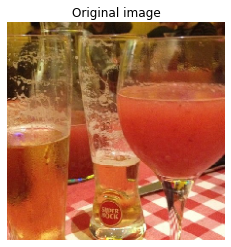

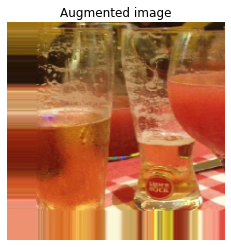

In [58]:
# show the original image and augmented image
import random
random_number = random.randint(0,32)
print("Showing image number: " ,{random_number})
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)


now we have seen augmented training data looks like, let's see howit learns

In [59]:
# create a model
model_6 = Sequential([
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
                      
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer= Adam(),
                metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5, 
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 549ms/step - loss: 0.7088 - accuracy: 0.5067 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6943 - accuracy: 0.5027 - val_loss: 0.6726 - val_accuracy: 0.5880
Epoch 3/5
47/47 [==============================] - 26s 545ms/step - loss: 0.7179 - accuracy: 0.5327 - val_loss: 0.6659 - val_accuracy: 0.6540
Epoch 4/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6857 - accuracy: 0.5380 - val_loss: 0.6413 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6783 - accuracy: 0.6093 - val_loss: 0.5825 - val_accuracy: 0.7780


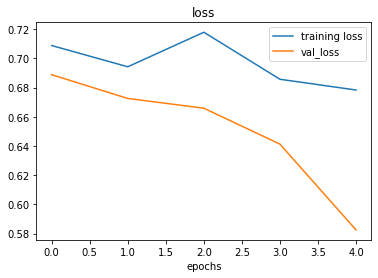

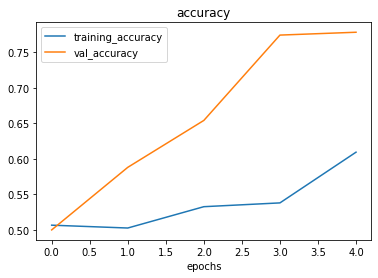

In [60]:
#check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model same as before

In [61]:
 # import data and augment it and shuffle from the training the directory
 train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                             target_size=(224,224),
                                                                             class_mode="binary",
                                                                             batch_size=32,
                                                                             shuffle=True)

Found 1500 images belonging to 2 classes.


# create the model (same as model_5 and model_6)
model_7 = Sequential([
                      Conv2D(10,3,activation="relu", input_shape=(22,224,3)),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation="sigmoid")
])


model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5, 
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps=len(test_data))

In [62]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 27s 554ms/step - loss: 0.6453 - accuracy: 0.6067 - val_loss: 0.5271 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6167 - accuracy: 0.6527 - val_loss: 0.4885 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5282 - accuracy: 0.7400 - val_loss: 0.3876 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.5067 - accuracy: 0.7587 - val_loss: 0.3799 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 26s 548ms/step - loss: 0.4879 - accuracy: 0.7667 - val_loss: 0.3299 - val_accuracy: 0.8600


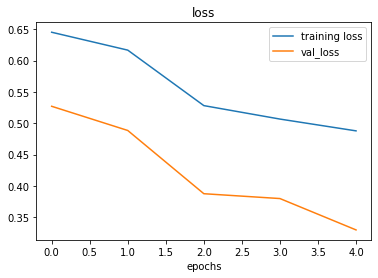

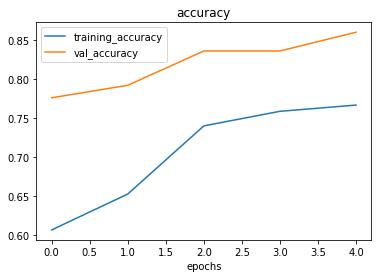

In [63]:
plot_loss_curves(history_7)

In [64]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 575ms/step - loss: 0.6417 - accuracy: 0.6233 - val_loss: 0.4880 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 27s 566ms/step - loss: 0.6032 - accuracy: 0.6773 - val_loss: 0.5273 - val_accuracy: 0.7260
Epoch 3/5
47/47 [==============================] - 27s 565ms/step - loss: 0.5636 - accuracy: 0.7167 - val_loss: 0.4328 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 26s 564ms/step - loss: 0.5356 - accuracy: 0.7300 - val_loss: 0.4090 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 27s 565ms/step - loss: 0.5319 - accuracy: 0.7420 - val_loss: 0.4397 - val_accuracy: 0.7880


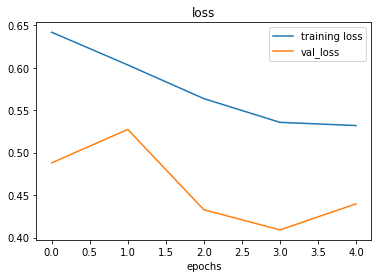

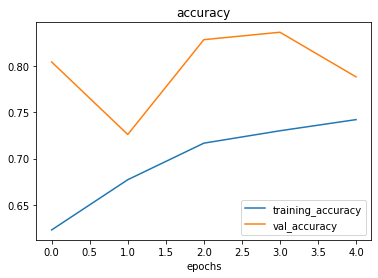

In [65]:
plot_loss_curves(history_8)

since we have already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers 
* Increase the number of filters in each  convoulution layer
* Train for longer 
* get more data
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use

# Making a prediction with our trained model on our own custom data

In [66]:
# classes we are working with 
print(class_names)

['pizza' 'steak']


--2021-07-15 10:55:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2021-07-15 10:55:02 (16.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

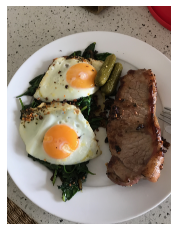

In [67]:
# view our wxample image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [68]:
steak.shape

(4032, 3024, 3)

In [69]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [70]:
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [71]:
# create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Read an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, color_channels)
  """
  # Read in the image 
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image
  img = img/255.
  return img


In [72]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [73]:
pred = model_4.predict(tf.expand_dims(steak,axis=0))

In [74]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [75]:
# we can index the predicted class by rounding cthe prediciton probability and indexing it on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [76]:
def pred_and_plot(model, filename, class_names=class_names):
  #import target image and preprocess the image
  img = load_and_prep_image(filename)

  #make prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

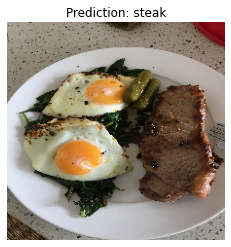

In [77]:
# test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

In [78]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-07-15 10:55:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2021-07-15 10:55:23 (19.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



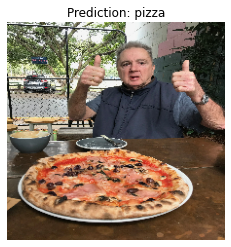

In [79]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")

# Multiclass image classification 


* Become one with the data
* Preprocess the data 
* create the model
* fit the model(overfit it to make sure it works
* Evaluate the model
* adjust different hyperparameters and improve the model(beat baseline/ reduce the overfitting)
* Repeat untill satisfied

# Import and become one with the data

In [80]:
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-07-15 10:55:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  95.3MB/s    in 5.5s    

2021-07-15 10:55:29 (89.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [81]:
import os
#walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} direcotries and{len(filenames)} images in '{dirpath}'.")

There are 2 direcotries and0 images in '10_food_classes_all_data'.
There are 10 direcotries and0 images in '10_food_classes_all_data/train'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/steak'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/ramen'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/pizza'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/sushi'.
There are 0 direcotries and750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 1

In [82]:
# setup the reainand test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [83]:
# let's get the class names
import numpy as np
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape: (512, 512, 3)


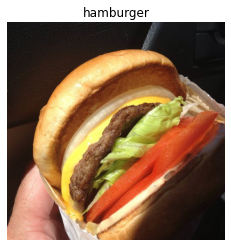

In [84]:
#visualize
import random

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

# Preprocess the data

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# create the model

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') 
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [88]:
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 242ms/step - loss: 2.1914 - accuracy: 0.1823 - val_loss: 2.0291 - val_accuracy: 0.2728
Epoch 2/5
235/235 [==============================] - 55s 235ms/step - loss: 1.9109 - accuracy: 0.3363 - val_loss: 1.8937 - val_accuracy: 0.3308
Epoch 3/5
235/235 [==============================] - 55s 235ms/step - loss: 1.5621 - accuracy: 0.4725 - val_loss: 2.0036 - val_accuracy: 0.3148
Epoch 4/5
235/235 [==============================] - 56s 238ms/step - loss: 1.0112 - accuracy: 0.6691 - val_loss: 2.5151 - val_accuracy: 0.2880
Epoch 5/5
235/235 [==============================] - 57s 241ms/step - loss: 0.4294 - accuracy: 0.8640 - val_loss: 3.5411 - val_accuracy: 0.2836


# Evaluate the model

In [89]:
model_9.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 3.5411 - accuracy: 0.2836


[3.5410656929016113, 0.28360000252723694]

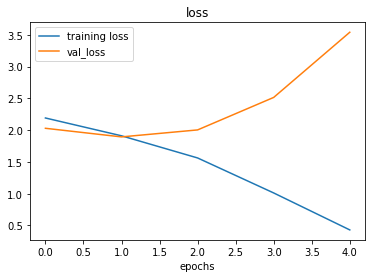

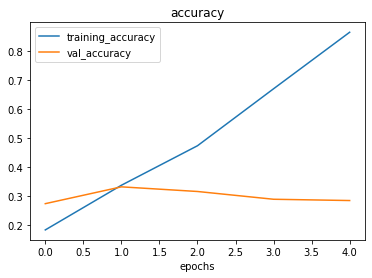

In [90]:
#checkout the model's loss curves
plot_loss_curves(history_9)

# adjust the model hyperparameters

In [91]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28090)            

In [92]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 221ms/step - loss: 2.1504 - accuracy: 0.2396 - val_loss: 1.9741 - val_accuracy: 0.3132
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 1.8122 - accuracy: 0.3844 - val_loss: 1.9042 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 52s 220ms/step - loss: 1.4778 - accuracy: 0.5117 - val_loss: 1.9952 - val_accuracy: 0.3308
Epoch 4/5
235/235 [==============================] - 51s 218ms/step - loss: 1.0156 - accuracy: 0.6793 - val_loss: 2.1817 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 51s 219ms/step - loss: 0.5516 - accuracy: 0.8399 - val_loss: 2.6129 - val_accuracy: 0.3060


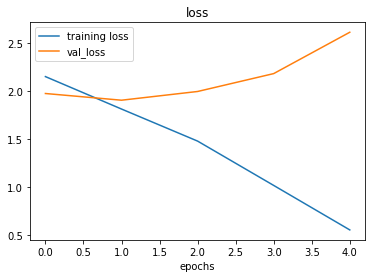

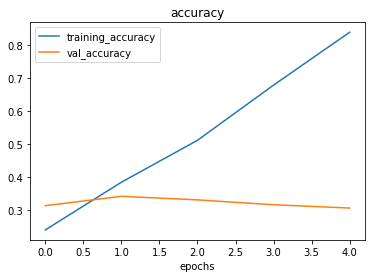

In [93]:
plot_loss_curves(history_10)

In [95]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary")
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Found 7500 images belonging to 10 classes.
Epoch 1/5


ValueError: ignored

In [96]:
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5


ValueError: ignored

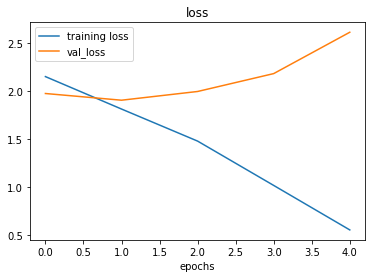

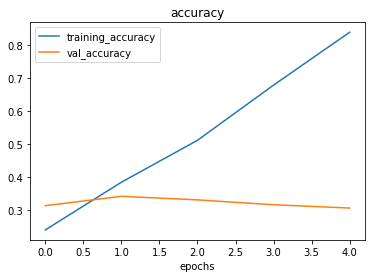

In [97]:
plot_loss_curves(history_10)

# Making predictions with our trained model

In [98]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [99]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [102]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #add in logic for multi-class
  if len(pred[0])==1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

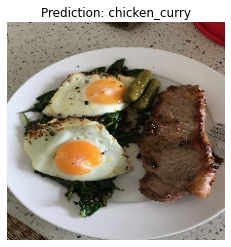

In [103]:
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

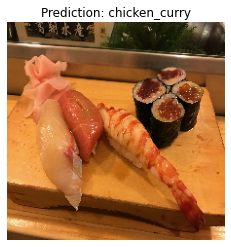

In [104]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

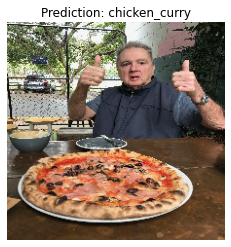

In [105]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

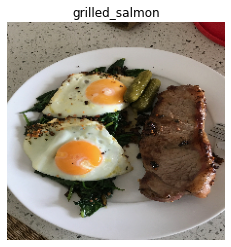

In [106]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

# Saving our model

In [110]:
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [111]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")

In [113]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 2.6129 - accuracy: 0.3060


[2.612948179244995, 0.3059999942779541]